<a href="https://colab.research.google.com/github/rogersdamas/deep-learning-projects/blob/main/Deep_Learning_pt_1_Introdu%C3%A7%C3%A3o_com_Keras_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Qual a diferença entre Machine Learning e Deep Learning?**

Enquanto o modelo de Machine Learning aprende com as características que nomeamos, as funções de Deep Learning extraem essas características, pois entendem quais características são essas. Lembrando que essa extração não precisa ser apenas para imagens ou problemas de classificação, podemos aplicar essa técnica para outros tipos de dados e problemas.

**Imports**

In [54]:
from scipy import ndimage
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

**Carregando o dataset**

In [55]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

**Explorando os dados**

In [56]:
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [57]:
len(imagens_treino)
imagens_treino.shape

(60000, 28, 28)

In [58]:
len(identificacoes_treino)
identificacoes_treino.shape

(60000,)

Text(0.5, 1.0, '9')

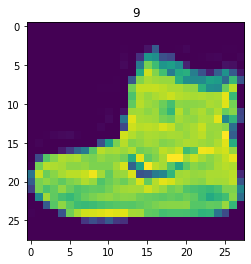

In [59]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [60]:
identificacoes_treino.min()

0

In [61]:
identificacoes_treino.max()

9

**Exibindo os dados**

In [62]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

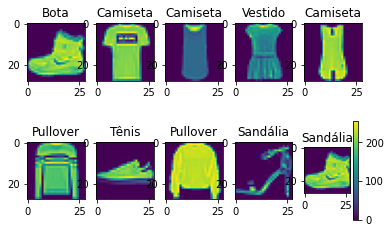

In [63]:
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])


plt.imshow(imagens_treino[0])
plt.colorbar()

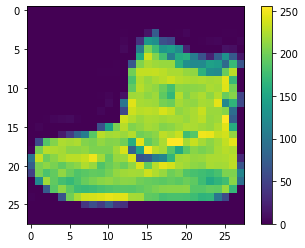

In [64]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [65]:
imagens_teste

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [66]:
len(imagens_teste)
imagens_teste.shape

(10000, 28, 28)

In [67]:
len(identificacoes_teste)
identificacoes_teste.shape

(10000,)

**Época**
- A contagem que aparece no número de épocas é quantas vezes passamos por cada uma das imagens treino ao treinarmos a nossa rede.

**Normalizando as imagens**

In [68]:
imagens_treino = imagens_treino/float(255) 

- Teremos as nossas imagens, que serão uma entrada, nossas funções serão o processamento e, no final, teremos uma saída. Agora, o nosso modelo considera tudo isso, essas três etapas.

- O que é que sabemos? Que nosso modelo possui uma entrada, o processamento e a saída, essas três camadas acontecendo. Cada uma delas será em sequência, primeiro entra, depois processa, e então sai.

- Podemos começar a escrever isso na linguagem do próprio Keras e do TensorFlow, então, pegaremos a palavra modelo e o faremos receber o que virá aqui. Sabemos que há uma sequencia, que em inglês é Sequential, então esta é a primeira coisa que escreveremos, que se encontra dentro do keras, então deixaremos keras.Sequential, utilizaremos este tipo de modelo dentro do Keras, algo que fará nossas camadas de entrada, processamento e saída acontecerem em sequência.

- Como isso é uma função, vamos abrir e fechar parênteses, e como é isso que organiza o nosso modelo, colocaremos as nossas camadas dentro deles. E como temos mais de uma coisa acontecendo, iremos abrir e fechar os colchetes para agruparmos tudo isso, indentando para ficar mais legal.

- Vamos começar pelo começo, então olharemos melhor nossa entrada comentando processamento e saida. Sabemos que nossa entrada são as imagens, então vamos pensar um pouco no que já exploramos e sabemos em relação às nossas imagens. Temos um exemplo que são um par de botas, e se formos pegar esta imagem, ao usarmos len ou shape, vimos que ela tinha 28 x 28, linhas e colunas. E que cada um desses espaços ocupava um número, isso será chamado de pixel, então as imagens são formadas por pixels.

- Se considerarmos 1px deste tamanho para esta imagem que vemos, conseguimos incluir 4px dentro dela, então dividimos esta imagem em 4px. Mas do mesmo modo que tínhamos 28 x 28, podemos ler esses 4px de outra forma, que são 2px para a nossa linha, e 2x para a coluna.

- Repare que quando chamamos esta imagem de 2 x 2px, estamos tendo uma imagem de 2 dimensões, linhas e colunas. O que podemos fazer nesta primeira camada que chamamos de camada 0 é pegar esses 2 x 2px e, por exemplo, ter uma função para lidar com cada pixel. Então, teríamos 4 unidades, 1 para cada pixel, e o que elas farão é reordenar e reagrupar estes pixels. Então, em vez de termos 2 dimensões, 2 linhas e 2 colunas, teremos 1 linha e 4 colunas, assim temos 1 dimensão com 4 pixels.

- É isso que faremos em nossa primeira camada, que é a que chamamos de camada 0. Essa é a nossa entrada. Voltaremos ao Notebook, e sabemos que em nossa entrada iremos lidar com imagens que temos no dataset, e elas não tinham 2 x 2 pixels, e sim 28 x 28 px. Esses números, que iremos agrupar entre parênteses e com uma vírgula entre eles, são as dimensões que vimos na forma da nossa imagem.

- Forma em inglês é shape, e até agora, quando falamos sobre entrada, estávamos falando sobre input, que é entrada em inglês. Ou seja, essa é nossa input_shape, ou a forma da entrada, imagens de 28 x 28px. Mas ainda temos que falar da tal da camada 0. Camada em inglês é layer, e o Keras possui várias camadas, então escreveremos layers.

- Para transformarmos a nossa imagem de 28 x 28px em um array de 1 dimensão, com todos esses 28, 28 pixels, iremos fazer um achatamento para as dimensões vetoriais. Isso em inglês fica Flatten, então usaremos keras.layers.Flatten, e como é uma função, abriremos e fecharemos parênteses, passando as nossas imagens de entrada para dentro dessa primeira camada, ou camada 0.

- Agora já temos um modelo, e sabemos que ele acontece em sequência, e temos a nossa primeira camada. Podemos rodar para ver o que acontece. Daremos Cmd + Enter, e obteremos um erro indicando que input_shape não foi definido, esquecemos de atribuir os 28, 28 no input_shape, basta acrescentarmos um sinal de igual em nosso código. Vamos rodar mais uma vez, legal, só que cadê o nosso modelo, criamos, mas onde ele está?

- É a mesma coisa do curso de Machine Learning, apenas criamos, falamos que existe uma camada dentro de um modelo sequencial, então agora podemos começar a fazer os outros passos para começar a ver a saída desse modelo.

- A função não linear introduz no modelo a transformação dos dados necessária para identificarmos as diferenças nas imagens que vamos classificar. Nesse caso, escolhemos a função ReLU.

**Criando, compilando, treinando e normalizando o modelo**

In [69]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)), #entrada - 1º camada
  keras.layers.Dense(256, activation=tensorflow.nn.relu), #processamento. A camada Dense é aquela que faz as conexões entre todas as unidades da camada 2 com as unidades da camada 1. RELU = UNIDADE LINEAR RETIFICADA
  keras.layers.Dense(128, activation=tensorflow.nn.relu),
  keras.layers.Dense(64, activation=tensorflow.nn.relu),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax) #saida. A função softmax vai dar uma probabilidade para cada unidade.
])
 
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5013 - accuracy: 0.8193 - val_loss: 0.4111 - val_accuracy: 0.8523
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3730 - accuracy: 0.8631 - val_loss: 0.3857 - val_accuracy: 0.8637
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3328 - accuracy: 0.8767 - val_loss: 0.3668 - val_accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3123 - accuracy: 0.8821 - val_loss: 0.3385 - val_accuracy: 0.8774
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2952 - accuracy: 0.8904 - val_loss: 0.3309 - val_accuracy: 0.8782


**Salvando e carregando o modelo treinado**

In [70]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [71]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2


**Vizualizando as acurácias de treino e validação por época**

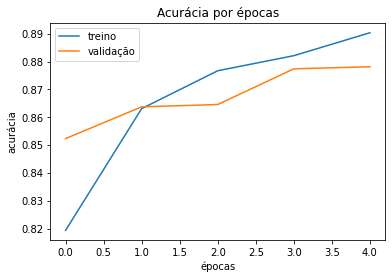

In [72]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

**Vizualizando as perdas de treino e validação por época**

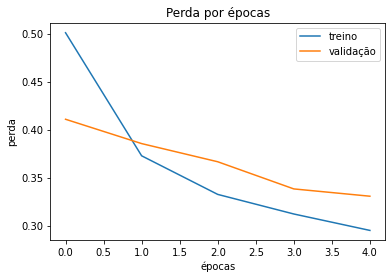

In [73]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

**Testando o modelo e o modelo salvo**

In [74]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


**Avaliando o modelo**

In [75]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 46.5068 - accuracy: 0.8554
Perda do teste: 46.5068473815918
Acurácia do teste: 0.855400025844574


In [76]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 46.5068 - accuracy: 0.8554
Perda do teste: 46.5068473815918
Acurácia do teste: 0.855400025844574


**Conclusão**
- Vamos recapitular o que vimos: primeiro usamos o tensorflow, específico para estes modelos de Deep Learning, e acima dele, que usamos para escrever nosso código com Python, foi o keras, uma API de alto nível. Também utilizamos o matplotlib, o pyplot para fazer nossos gráficos e visualizar nossas imagens, entendendo nosso dataset, usamos o numpy, e há o importe do load_model, para quando salvamos nosso modelo.

- Começamos usando o dataset fashion_mnist, que vem e está organizado dentro do próprio Keras, e vimos como ele voltava tuplas, acessava imagens_treino, identificacoes_treino, imagens_teste, identificacoes_teste, que vocês já tinham visto no curso de Machine Learning. E então carregamos os dados com outra função do Keras, então é legal que esta API faz bastante coisas para nós.

- Exploramos estes dados entendendo se eles eram vetores, quantas dimensões eles tinham, imagens, quantas para teste e quantas para treino, e o dataset não vinha com os nomes das classificações, demos uma olhada na documentação do fashion_mnist do Zalando Research. Começamos a entender os pixels das nossas imagens, que estavam em escala de cinza, e vimos que uma boa pedida seria normalizar essa imagem para termos valores menores, os quais nos ajudariam durante nosso modelo.

- Assim, fica mais fácil para nosso modelo processar estes dados, porque ele já faz muito. Começamos a construir este modelo que possui 3 camadas, a de entrada, 0, a primeira, densa, que é 1, Dropout que é 2 e a última, densa, que é 3. Vimos como fazer o Flatten, a ReLU, o que é Dropout, softmax, e quando fomos compilar o modelo, também entendemos que tínhamos que passar um otimizador, como calcularemos nossa perda, e uma métrica.

- Então treinamos nosso modelo, salvamos em um histórico, e deixamos 20% dos dados para validarmos este modelo, e fomos mexendo na quantidade de épocas. Brincamos com o número de camadas da nossa rede para ver o que acontecia, e vimos que há um detalhe do Notebook, que é necessário restartar o Runtime.

- Quando conseguimos chegar ao modelo que achamos mais interessante, porque fizemos os gráficos para visualizarmos as acurácias e as perdas que tivemos tanto em treino quanto em validação, com pyplot, salvamos e carregamos o modelo treinado. No meio disso tudo, também fomos testando este modelo com predict, como também tínhamos visto no curso de Machine Learning.

- Vimos o resultado do teste, o número da imagem de teste, e comparamos o primeiro predict com o modelo salvo para vermos se estava tudo ok, e estávamos com o arquivo do modelo ok. Depois disso também vimos que é possível avaliar o modelo, entendendo como ele estava indo em nosso conjunto de testes. Trata-se de mais um dado de perda e acurácia, para controlarmos e ver se está minimizando a perda e aumentando a acurácia, como vimos no vídeo anterior.

- Este é nosso objetivo, e vamos vendo o número de épocas, entendendo se está underfitting, overfitting, e vamos controlando para chegarmos em um bom resultado. Lembrando que além disso, é sempre importante que a sua rede generalize bem, então que a cada vez que tenha uma imagem nova, ela entenda e consiga classificar corretamente, com facilidade.